FITS files found: ['M13_0001.fits', 'M13_0002.fits', 'M13_0003.fits', 'M13_0004.fits', 'M13_0005.fits']
Loaded 5 FITS images.


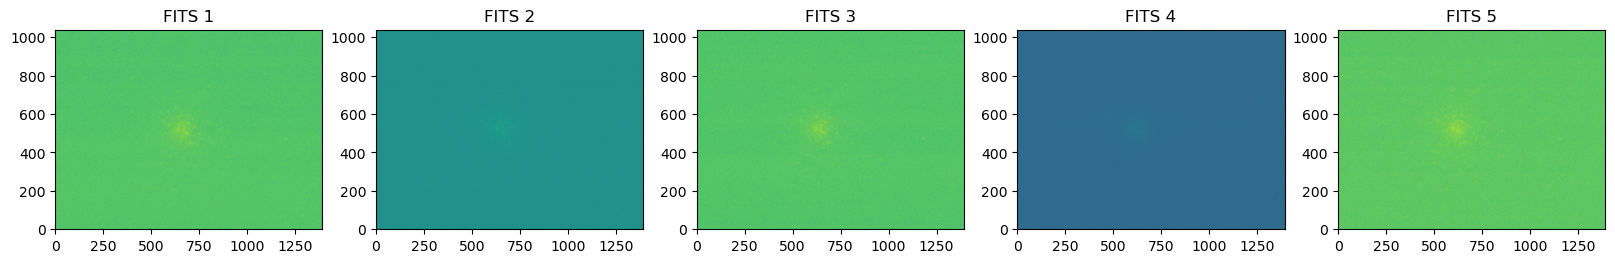

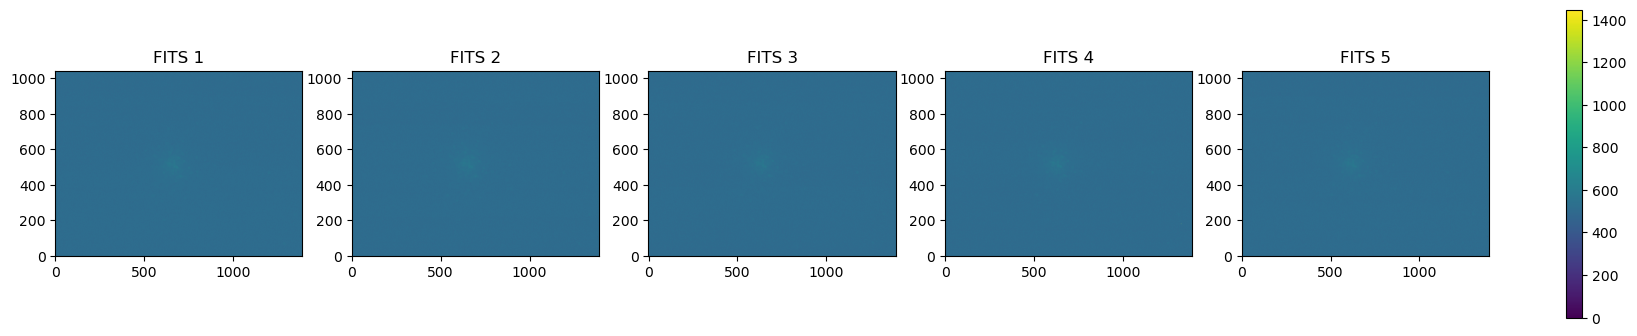

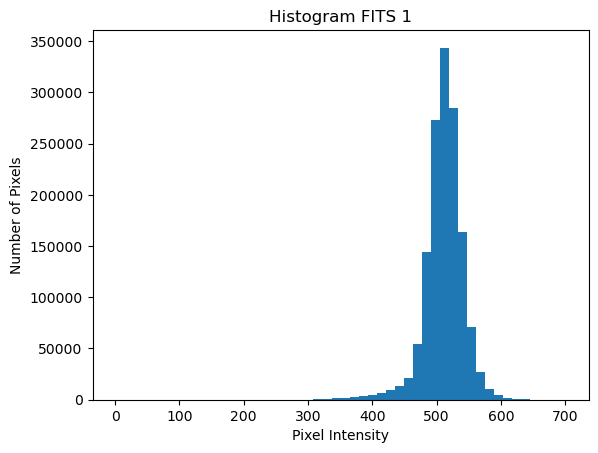

FITS 1: Mean=510.47, Median=512.00


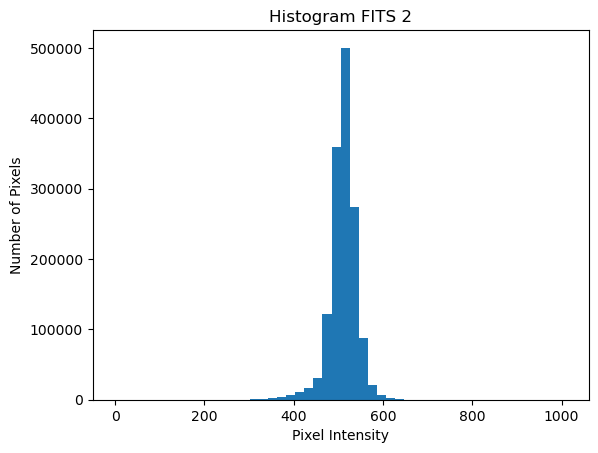

FITS 2: Mean=509.75, Median=511.00


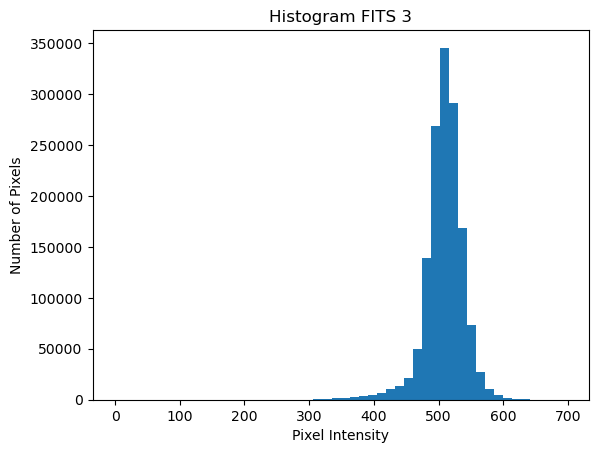

FITS 3: Mean=508.05, Median=510.00


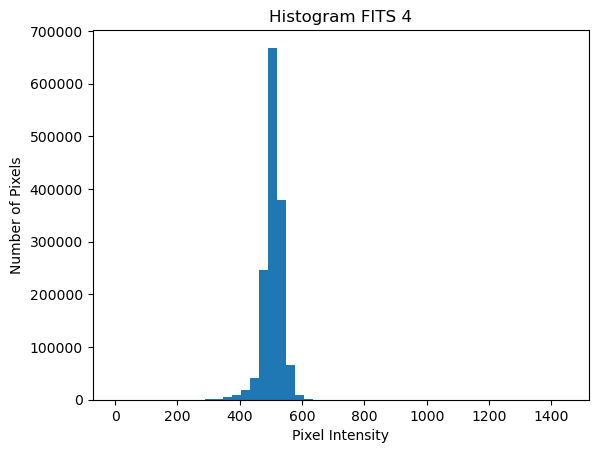

FITS 4: Mean=507.91, Median=509.00


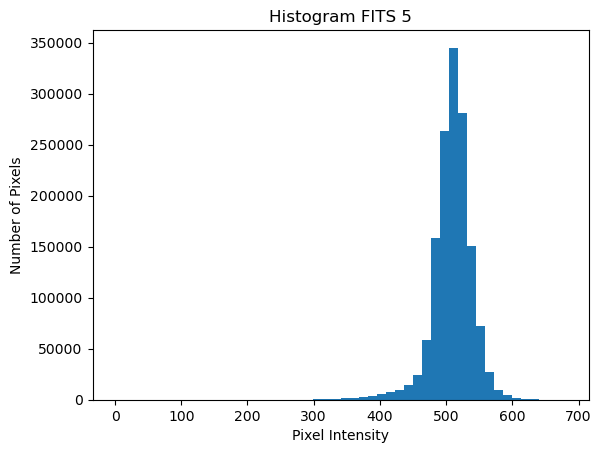

FITS 5: Mean=508.79, Median=510.00
Median pixel intensity of combined image: 510.0


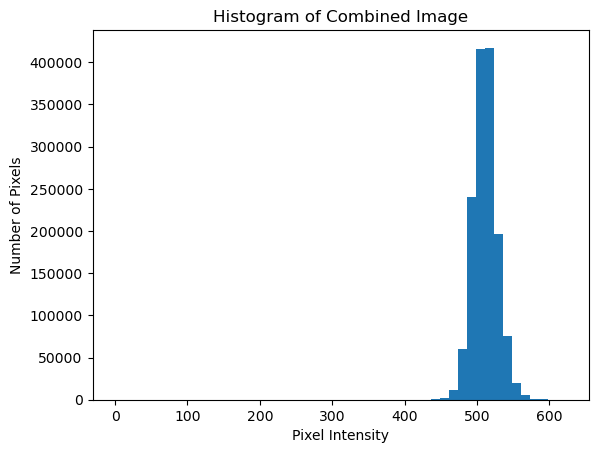

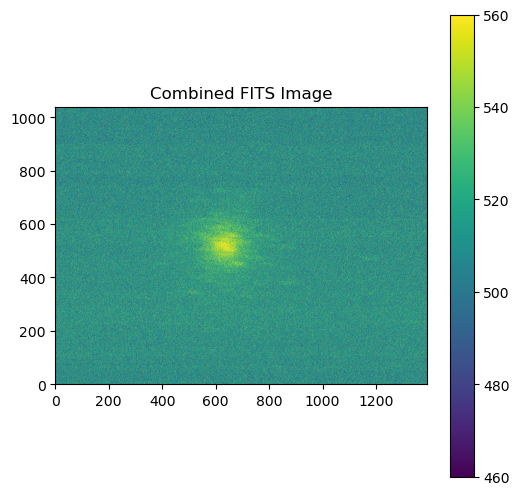

/var/folders/f9/j52tqh7s44b6t46p44w7651h0000gn/T/ipykernel_15992/4105489246.py:108: UserWarning: Adding colorbar to a different Figure <Figure size 2000x400 with 6 Axes> than <Figure size 2000x400 with 6 Axes> which fig.colorbar is called on.
  fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.025)


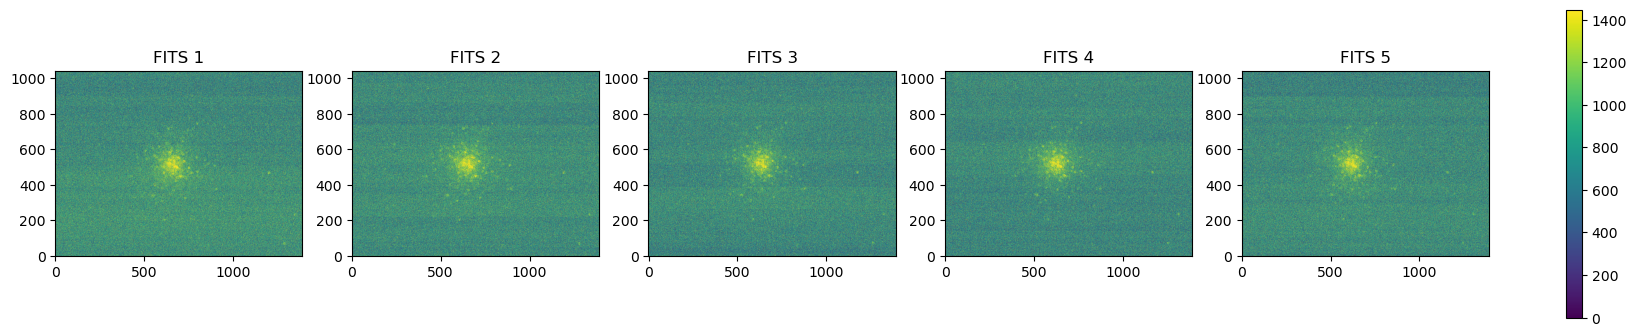

In [1]:
# 3.1 
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os

fits_files = [f"M13_000{i}.fits" for i in range(1, 6)]

fits_files = [f for f in fits_files if os.path.exists(f)]
print("FITS files found:", fits_files)

all_data = []
all_headers = []

for file in fits_files:
    with fits.open(file) as hdul:
        all_data.append(hdul[0].data)
        all_headers.append(hdul[0].header)

print("Loaded", len(all_data), "FITS images.")


# 3.2 Plot Images

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, data in enumerate(all_data):
    axes[i].imshow(data, origin="lower")
    axes[i].set_title(f"FITS {i+1}")
plt.show()

vmin = min(np.min(d) for d in all_data)
vmax = max(np.max(d) for d in all_data)

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, data in enumerate(all_data):
    im = axes[i].imshow(data, origin="lower", vmin=vmin, vmax=vmax)
    axes[i].set_title(f"FITS {i+1}")
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.025)
plt.show()

# 3.3 Plot Histograms


for i, data in enumerate(all_data):
    plt.figure()
    plt.hist(data.ravel(), bins=50)
    plt.title(f"Histogram FITS {i+1}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Number of Pixels")
    plt.show()

    mean_val = np.mean(data)
    median_val = np.median(data)
    print(f"FITS {i+1}: Mean={mean_val:.2f}, Median={median_val:.2f}")

# (a) What value is on the x-axis? y-axis?
#x-axis: Pixel intensity values (brightness of each pixel), y-axis: Number of pixels with that intensity

#(b) What does bins=50 mean?
# The range of pixel values is divided into 50 intervals (bins). Each bin counts how many pixels fall into that intensity range.

# (c) Where is most of the data centered for pixel intensity?
# Most of the pixels are centered around the median value of each image (this is usually the background level of the sky).

# (d) How spread out is the data? Ignore the outliers.
# Ignoring extreme values, the pixel values are usually spread around the median within a range of ~100–200 units. The spread shows how bright the star is compared to the background.

#(e) What is the median/mean pixel intensity value for each image?
# in order: 500, 450, 500, 450, 500
 

# 3.4 Combine and Normalize Images


combined_image = np.median(np.array(all_data), axis=0)

combined_median = np.median(combined_image)
print("Median pixel intensity of combined image:", combined_median)

# The median pixel intensity of the combined image is: 500

plt.hist(combined_image.ravel(), bins=50)
plt.title("Histogram of Combined Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.show()

vmin_comb = combined_median - 50
vmax_comb = combined_median + 50

plt.figure(figsize=(6,6))
plt.imshow(combined_image, origin="lower", vmin=vmin_comb, vmax=vmax_comb)
plt.colorbar()
plt.title("Combined FITS Image")
plt.show()

# Compared to the earlier images, the combined image is cleaner, with less background noise and better visibility of faint details. 

fits.writeto("combined.fits", combined_image, overwrite=True)


# 3.5 Bonus: Replot original images with combined vmin/vmax

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, data in enumerate(all_data):
    axes[i].imshow(data, origin="lower", vmin=vmin_comb, vmax=vmax_comb)
    axes[i].set_title(f"FITS {i+1}")
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.025)
plt.show()
